In [1]:
#import required libraries
import pandas as pd
from  matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import re

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# read data
listing_df = pd.read_csv('../../Data/listings.csv')

In [3]:
# 1- looking at data 
#exploring top 5 rows.
listing_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
#check for categorical columns
cat_vars = listing_df.select_dtypes(include=['object']).copy().columns
cat_vars

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

In [5]:
#number of rows and columns
num_rows = listing_df.shape[0] #Provide the number of rows in the dataset
num_cols = listing_df.shape[1] #Provide the number of columns in the dataset
print(num_rows, num_cols)

3818 92


In [6]:
#checking for null columns (more than 80%)
listing_df.columns[listing_df.isnull().mean()> 0.8]

Index(['square_feet', 'license'], dtype='object')

In [7]:
#drop columns which has more than 75% of nulls, also drop experiences_offered, because it has only none value
listing_df.drop(['license','square_feet','experiences_offered'], axis = 1, inplace=True)

In [8]:
# feature of intrest 
columns = ["id","neighbourhood","neighbourhood_group_cleansed","latitude","longitude","property_type","room_type",
           "accommodates","bathrooms","bedrooms","beds","bed_type","amenities","is_location_exact","price","weekly_price", "monthly_price", 'security_deposit', 'cleaning_fee',
           "extra_people","number_of_reviews","review_scores_rating",
           "review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication",
           "review_scores_location","review_scores_value", "instant_bookable", "requires_license", "cancellation_policy","reviews_per_month"]
listing_df = listing_df[columns]

# rename columns
listing_df.rename(columns={'id':'listing_id'}, inplace=True)
listing_df.rename(columns={'price':'listing_price'}, inplace=True)
listing_df.rename(columns={'neighbourhood_group_cleansed':'neighbourhood_group'}, inplace=True)


In [9]:
# convert neighbourhood group,room_type,bed_type,is_location_exact,instant_bookable,
# requires_license and cancellation_policy  to columns
listing_df['neighbourhood_group_copy'] = listing_df['neighbourhood_group']
listing_df = pd.get_dummies(listing_df, columns=['neighbourhood_group_copy'],drop_first=True)
#listing_df.drop('neighbourhood_group_Other neighborhoods',axis='columns', inplace=True) 

listing_df['property_type_copy'] = listing_df['property_type']
listing_df = pd.get_dummies(listing_df, columns=['property_type_copy'],drop_first=True)
#listing_df.drop('property_type_Other',axis='columns', inplace=True)

listing_df['room_type_copy'] = listing_df['room_type']
listing_df = pd.get_dummies(listing_df, columns=['room_type_copy'],drop_first=True)
#listing_df.drop('room_type_Shared room',axis='columns', inplace=True) 

listing_df['bed_type_copy'] = listing_df['bed_type']
listing_df = pd.get_dummies(listing_df, columns=['bed_type_copy'],drop_first=True)
#listing_df.drop('bed_type_Real Bed',axis='columns', inplace=True) 

listing_df['cancellation_policy_copy'] = listing_df['cancellation_policy']
listing_df = pd.get_dummies(listing_df, columns=['cancellation_policy_copy'],drop_first=True)
#listing_df.drop('cancellation_policy_strict',axis='columns', inplace=True)  

listing_df

,listing_id,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,property_type_copy_Treehouse,property_type_copy_Yurt,room_type_copy_Private room,room_type_copy_Shared room,bed_type_copy_Couch,bed_type_copy_Futon,bed_type_copy_Pull-out Sofa,bed_type_copy_Real Bed,cancellation_policy_copy_moderate,cancellation_policy_copy_strict
0,241032,Queen Anne,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,...,0,0,0,0,0,0,0,1,1,0
1,953595,Queen Anne,Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,...,0,0,0,0,0,0,0,1,0,1
2,3308979,Queen Anne,Queen Anne,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,...,0,0,0,0,0,0,0,1,0,1
3,7421966,Queen Anne,Queen Anne,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,278830,Queen Anne,Queen Anne,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,Fremont,Other neighborhoods,47.664295,-122.359170,House,Entire home/apt,6,2.0,3.0,...,0,0,0,0,0,0,0,1,0,1
3814,8902327,Portage Bay,Capitol Hill,47.649552,-122.318309,Apartment,Entire home/apt,4,1.0,1.0,...,0,0,0,0,0,0,0,1,1,0
3815,10267360,NaN,Rainier Valley,47.508453,-122.240607,House,Entire home/apt,2,1.0,1.0,...,0,0,0,0,0,0,0,1,1,0
3816,9604740,NaN,Capitol Hill,47.632335,-122.275530,Condominium,Entire home/apt,2,1.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [10]:
# fix the price column (remove $ sign, comma and convert to fl)
# airbnb_df.price = airbnb_df.price.str.replace("[,$%]",'', regex=True).astype(float)

def clean_Price(x):
    '''
    INPUT:
    x - The price which is not a number and has $ and comma symboles 
    
    OUTPUT:
    number: the float value of the price
    '''
    return float(re.sub("[,$%]",'', str(x)))


listing_df.listing_price = listing_df.listing_price.apply(clean_Price)
listing_df.extra_people = listing_df.weekly_price.apply(clean_Price)
listing_df.weekly_price = listing_df.monthly_price.apply(clean_Price)
listing_df.monthly_price = listing_df.monthly_price.apply(clean_Price)
listing_df.security_deposit = listing_df.security_deposit.apply(clean_Price)
listing_df.cleaning_fee = listing_df.cleaning_fee.apply(clean_Price)
listing_df.extra_people = listing_df.extra_people.apply(clean_Price)


In [11]:
#check for columns data typed, we notics price columns need to be converted to float
listing_df.select_dtypes(include=['object']).copy().columns
listing_df.describe()

,listing_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,listing_price,weekly_price,monthly_price,...,property_type_copy_Treehouse,property_type_copy_Yurt,room_type_copy_Private room,room_type_copy_Shared room,bed_type_copy_Couch,bed_type_copy_Futon,bed_type_copy_Pull-out Sofa,bed_type_copy_Real Bed,cancellation_policy_copy_moderate,cancellation_policy_copy_strict
count,3.818000e+03,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,1517.000000,1517.000000,...,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.00000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,127.976166,2613.336190,2613.336190,...,0.000786,0.000262,0.303824,0.030644,0.003405,0.019382,0.01231,0.957831,0.327658,0.371137
std,2.962660e+06,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,90.250022,1722.267981,1722.267981,...,0.028024,0.016184,0.459968,0.172375,0.058260,0.137881,0.11028,0.201000,0.469421,0.483172
min,3.335000e+03,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,20.000000,500.000000,500.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.258256e+06,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,75.000000,1512.000000,1512.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
50%,6.118244e+06,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,100.000000,2200.000000,2200.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,8.035127e+06,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,150.000000,3150.000000,3150.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
max,1.034016e+07,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,1000.000000,19500.000000,19500.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [12]:
calendar_df = pd.read_csv('../../Data/calendar.csv')
calendar_df.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [13]:
#fix price column 
calendar_df.price = calendar_df.price.apply(clean_Price)
#calendar_df.dropna(subset = ['price'], inplace=True)
calendar_df.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [14]:
airbnb_df = pd.merge(listing_df, calendar_df, on='listing_id')
airbnb_df.head(5)

,listing_id,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,room_type_copy_Shared room,bed_type_copy_Couch,bed_type_copy_Futon,bed_type_copy_Pull-out Sofa,bed_type_copy_Real Bed,cancellation_policy_copy_moderate,cancellation_policy_copy_strict,date,available,price
0,241032,Queen Anne,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,...,0,0,0,0,1,1,0,2016-01-04,t,85.0
1,241032,Queen Anne,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,...,0,0,0,0,1,1,0,2016-01-05,t,85.0
2,241032,Queen Anne,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,...,0,0,0,0,1,1,0,2016-01-06,f,NaN
3,241032,Queen Anne,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,...,0,0,0,0,1,1,0,2016-01-07,f,NaN
4,241032,Queen Anne,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,...,0,0,0,0,1,1,0,2016-01-08,f,NaN


##### 1- what is the most popular neighborhoods in Boston?

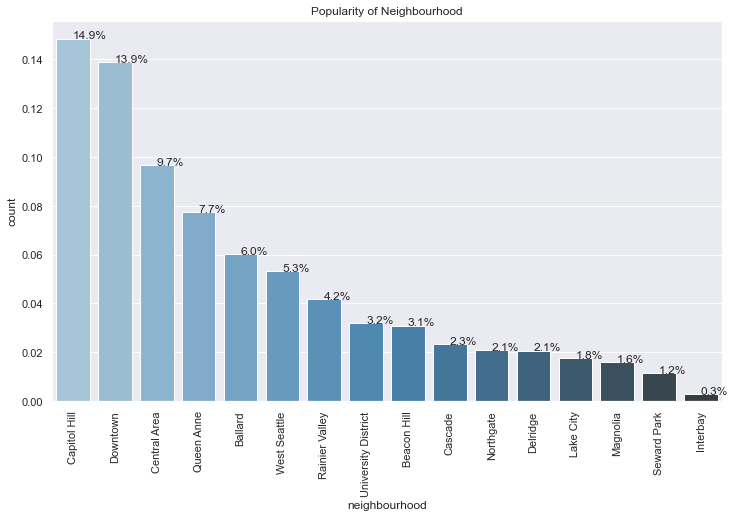

In [15]:
#check neighborhood quanity, lets only select the popular neighborhood, which has quantity more than 10
nh_count = airbnb_df.neighbourhood_group.value_counts() / airbnb_df.shape[0]
nh_count = nh_count.reset_index()
nh_count.rename(columns={'index':'neighbourhood','neighbourhood_group':'count'}, inplace=True)
nh_count = nh_count[nh_count.neighbourhood != 'Other neighborhoods']
sns.set(rc={'figure.figsize':(12,7)})
ax = sns.barplot(data=nh_count, x='neighbourhood', y='count', palette = 'Blues_d')
ax.set_xticklabels(labels = nh_count['neighbourhood'], rotation=90);
ax.set_title('Popularity of Neighbourhood');


for index, value in enumerate(nh_count['count']):
    plt.text(index, value, '{:,.1f}%'.format(value*100))

##### 2- what is the most expensive neighborhoods in Boston?

In [16]:
price_df = airbnb_df[['neighbourhood_group', 'price']].groupby('neighbourhood_group').mean()

In [17]:
price_df = price_df.reset_index()
price_df = price_df.sort_values(by=['price'], ascending=True)
#price_df = price_df.tail(10)
price_df

,neighbourhood_group,price
5,Delridge,90.926944
10,Northgate,93.455532
8,Lake City,94.518589
13,Rainier Valley,100.104924
1,Beacon Hill,100.668781
15,University District,104.709937
14,Seward Park,111.110338
7,Interbay,118.421037
11,Other neighborhoods,125.622015
0,Ballard,125.905980


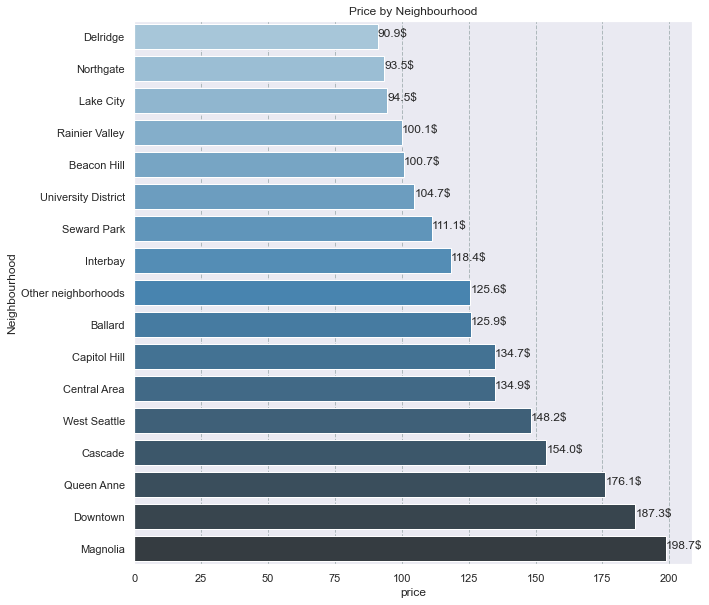

In [18]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data = price_df, y='neighbourhood_group', x='price', color="b",ci = None, palette = 'Blues_d')
plt.ylabel('Neighbourhood')
plt.title('Price')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.7)
for index, value in enumerate(price_df['price']):
    plt.text(value, index, "{:.1f}$".format(value))
ax.set_title('Price by Neighbourhood');

### 2- what is the beak time ?

Text(0.5, 1.0, 'Price Distribution')

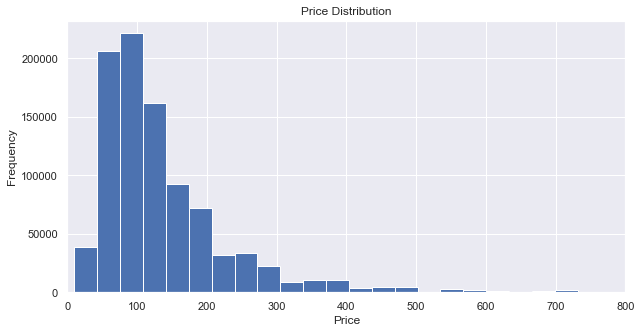

In [19]:
#Lets look at the price distribution
plt.figure(figsize=(10,5))
airbnb_df.price.hist(bins=50)
plt.xlim(0, 800)
plt.xlabel('Price')
plt.ylabel('Frequency');
plt.title("Price Distribution")


In [20]:
airbnb_df['month'] =  pd.DatetimeIndex(airbnb_df['date']).month
airbnb_df['year'] =  pd.DatetimeIndex(airbnb_df['date']).year

Text(0.5, 1.0, 'Price by month')

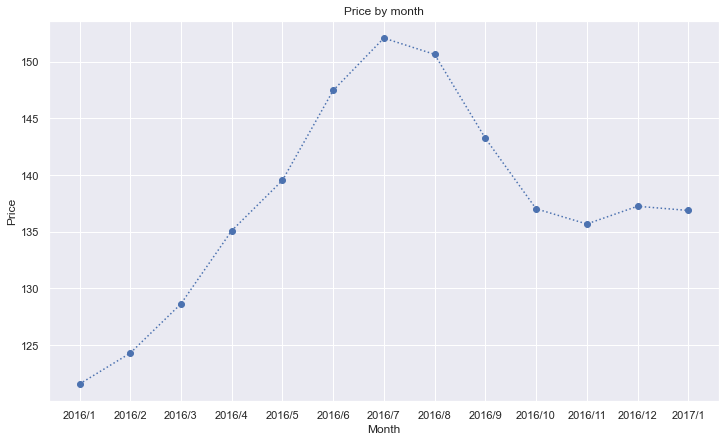

In [21]:
airbnb_df['yearmonth'] = pd.DatetimeIndex(airbnb_df['date']).year.astype(str) + "/" + pd.DatetimeIndex(airbnb_df['date']).month.astype(str)
sub_listing = airbnb_df.groupby(['yearmonth', 'year', 'month'])['price'].mean().reset_index()
sub_listing.sort_values(by=['year', 'month'], inplace=True)
plt.figure(figsize=(12,7))
plt.plot('yearmonth', 'price', 'o:', data=sub_listing)

plt.xlabel('Month')
plt.ylabel('Price');
plt.title("Price by month")
#for index, value in enumerate(sub_listing.price):
   # plt.text(index,value,  "{:.1f}".format(value))
    

In [22]:
airbnb_df['neighbourhood_group'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

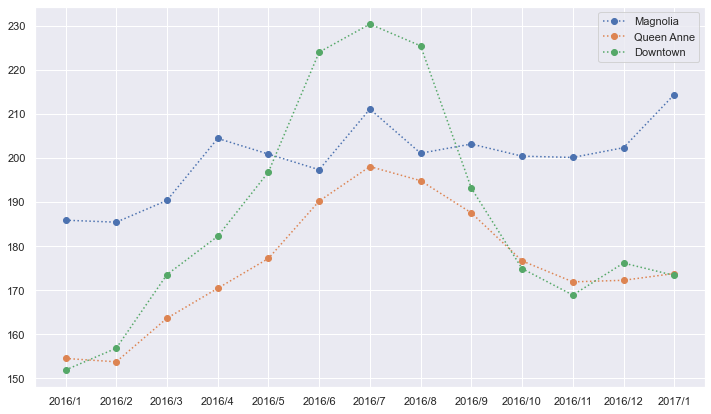

In [23]:
plt.figure(figsize=(12,7))

for cat in ['Magnolia', 'Queen Anne', 'Downtown']:
    sub_listing = airbnb_df[airbnb_df.neighbourhood_group ==cat]
    sub_listing = sub_listing.groupby(['yearmonth', 'year', 'month'])['price'].mean().reset_index()
    sub_listing.sort_values(by=['year', 'month'], inplace=True)
    plt.plot('yearmonth', 'price', 'o:', data=sub_listing)
    plt.legend(['Magnolia', 'Queen Anne', 'Downtown'])

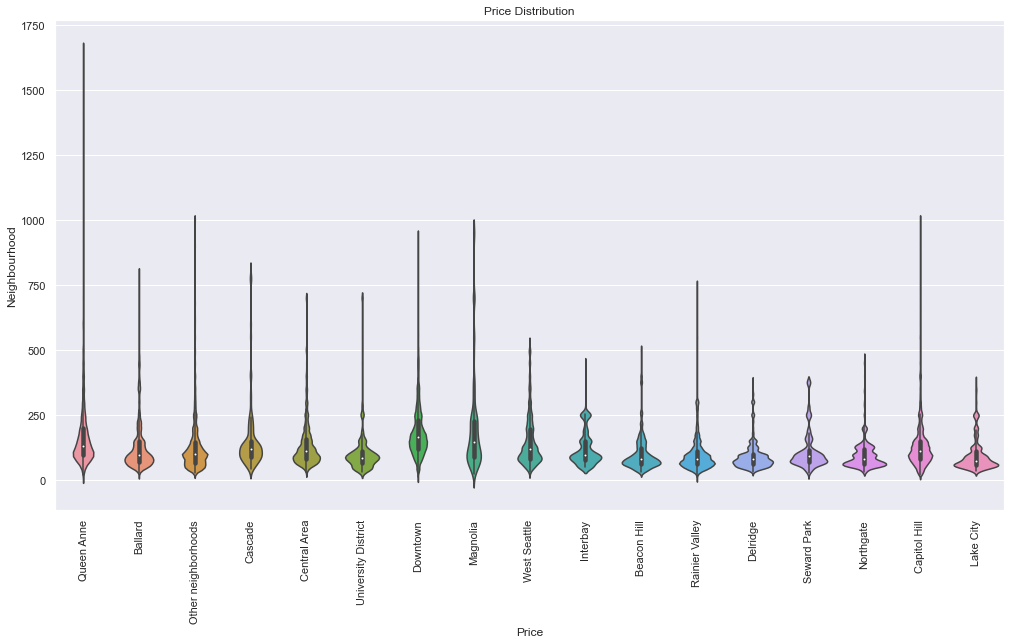

In [24]:
plt.figure(figsize=(17,9))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=airbnb_df)
plt.xticks(rotation=90)
plt.xlabel('Price')
plt.ylabel('Neighbourhood');
plt.title("Price Distribution");

#### 3 - what is the features for the least reviews?

In [25]:
review_scores_rating_df = listing_df[['neighbourhood_group', 'review_scores_rating']].groupby('neighbourhood_group').mean().sort_values(by='review_scores_rating') / 10
review_scores_accuracy_df = listing_df[['neighbourhood_group', 'review_scores_accuracy']].groupby('neighbourhood_group').mean().sort_values(by='review_scores_accuracy')
review_scores_cleanliness_df = listing_df[['neighbourhood_group', 'review_scores_cleanliness']].groupby('neighbourhood_group').mean().sort_values(by='review_scores_cleanliness')
review_scores_checkin_df = listing_df[['neighbourhood_group', 'review_scores_checkin']].groupby('neighbourhood_group').mean().sort_values(by='review_scores_checkin')
review_scores_communication_df = listing_df[['neighbourhood_group', 'review_scores_communication']].groupby('neighbourhood_group').mean().sort_values(by='review_scores_communication')
review_scores_location_df = listing_df[['neighbourhood_group', 'review_scores_location']].groupby('neighbourhood_group').mean().sort_values(by='review_scores_location')
review_scores_value_df = listing_df[['neighbourhood_group', 'review_scores_value']].groupby('neighbourhood_group').mean().sort_values(by='review_scores_value')

In [26]:
# df_merge = pd.merge(review_scores_rating_df,review_scores_accuracy_df, left_index=True, right_index=True)
# df_merge = pd.merge(df_merge,review_scores_cleanliness_df, left_index=True, right_index=True)
df_merge = pd.merge(review_scores_cleanliness_df,review_scores_checkin_df, left_index=True, right_index=True)
df_merge = pd.merge(df_merge,review_scores_communication_df, left_index=True, right_index=True)
df_merge = pd.merge(df_merge,review_scores_location_df, left_index=True, right_index=True)
#df_merge = pd.merge(df_merge,review_scores_value_df, left_index=True, right_index=True)

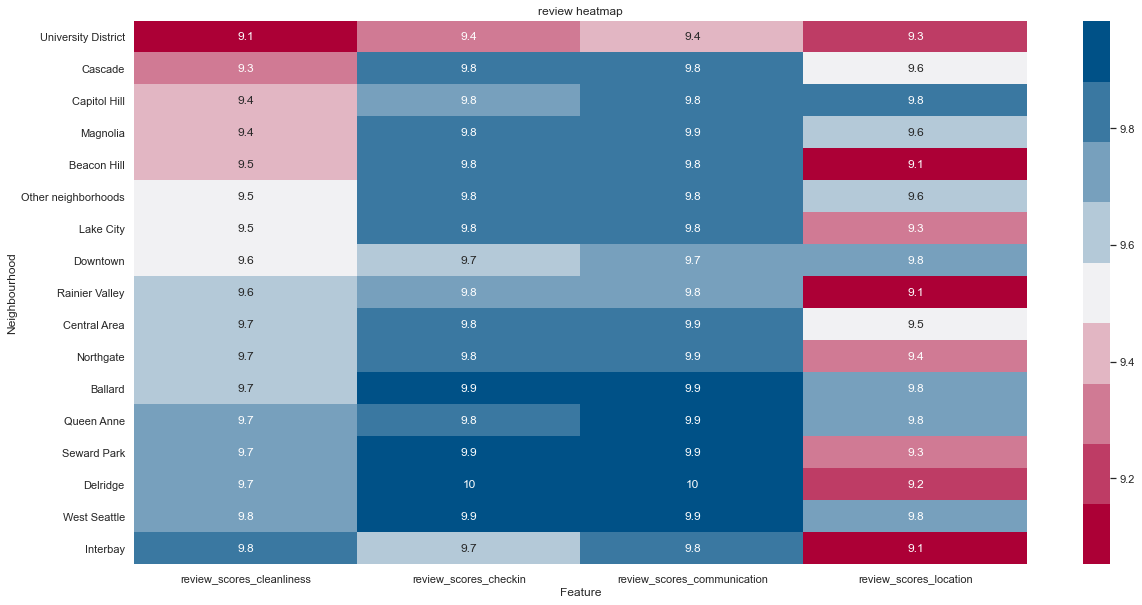

In [27]:
plt.figure(figsize=(20,10))
sns.diverging_palette(0, 160, l=65, center="dark", as_cmap=True)

#df_merge.sort_values(by='review_scores_value')
color_map = sns.diverging_palette(0, 240, s=150, l=31,
                                  n=9, center="light")

sns.heatmap(df_merge, annot=True ,cmap=color_map )
plt.xlabel('Feature')
plt.ylabel('Neighbourhood');
plt.title("review heatmap");

## Predection

In [28]:
print(airbnb_df.columns)

Index(['listing_id', 'neighbourhood', 'neighbourhood_group', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'is_location_exact',
       'listing_price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'extra_people', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'requires_license',
       'cancellation_policy', 'reviews_per_month',
       'neighbourhood_group_copy_Beacon Hill',
       'neighbourhood_group_copy_Capitol Hill',
       'neighbourhood_group_copy_Cascade',
       'neighbourhood_group_copy_Central Area',
       'neighbourhood_group_copy_Delridge',
       'neighbourhood_group_copy_Downtown',
       'neighbourhood_group_copy_Interbay',
       'neighbour

In [29]:
airbnb_df.select_dtypes(include=['object']).copy().columns

Index(['neighbourhood', 'neighbourhood_group', 'property_type', 'room_type',
       'bed_type', 'amenities', 'is_location_exact', 'instant_bookable',
       'requires_license', 'cancellation_policy', 'date', 'available',
       'yearmonth'],
      dtype='object')

In [30]:
# property_type	room_type	bed_type, neighbourhood_group_cleansed,Free Parking on Premises
#drop all nulls
#airbnb_df1= airbnb_df[['accommodates', 'bathrooms', 'bedrooms', 'beds','price','review_scores_rating','TV',
 #      'Cable TV', 'Internet', 'Wireless Internet', 'Air Conditioning',
 #      'Kitchen', 'Heating', 'Family/Kid Friendly']].dropna(axis=0, how="any")
#[['price', 'TV','Cable TV','Family/Kid Friendly','Washer', 'Dryer','Gym', '', 'Pool','Elevator in Building','Pets Allowed']]

airbnb_df1 = airbnb_df[[ 'accommodates', 'bathrooms',
       'bedrooms', 'beds',  
       'neighbourhood_group_copy_Beacon Hill',
       'neighbourhood_group_copy_Capitol Hill',
       'neighbourhood_group_copy_Cascade',
       'neighbourhood_group_copy_Central Area',
       'neighbourhood_group_copy_Delridge',
       'neighbourhood_group_copy_Downtown',
       'neighbourhood_group_copy_Interbay',
       'neighbourhood_group_copy_Lake City',
       'neighbourhood_group_copy_Magnolia',
       'neighbourhood_group_copy_Northgate',
       'neighbourhood_group_copy_Other neighborhoods',
       'neighbourhood_group_copy_Queen Anne',
       'neighbourhood_group_copy_Rainier Valley',
       'neighbourhood_group_copy_Seward Park',
       'neighbourhood_group_copy_University District',
       'neighbourhood_group_copy_West Seattle',
       'property_type_copy_Bed & Breakfast', 'property_type_copy_Boat',
       'property_type_copy_Bungalow', 'property_type_copy_Cabin',
       'property_type_copy_Camper/RV', 'property_type_copy_Chalet',
       'property_type_copy_Condominium', 'property_type_copy_Dorm',
       'property_type_copy_House', 'property_type_copy_Loft',
       'property_type_copy_Other', 'property_type_copy_Tent',
       'property_type_copy_Townhouse', 'property_type_copy_Treehouse',
       'property_type_copy_Yurt', 'room_type_copy_Private room',
       'room_type_copy_Shared room', 'price']]
airbnb_df1= airbnb_df1.dropna()

In [31]:
#sns.set(rc={'figure.figsize':(20,20)})
#sns.heatmap()
corr_df = airbnb_df1.corr()['price'].reset_index()
corr_df.sort_values(by='price', ascending=False)

,index,price
37,price,1.000000
0,accommodates,0.676042
2,bedrooms,0.632580
3,beds,0.610037
1,bathrooms,0.525839
9,neighbourhood_group_copy_Downtown,0.184506
15,neighbourhood_group_copy_Queen Anne,0.100938
21,property_type_copy_Boat,0.090726
12,neighbourhood_group_copy_Magnolia,0.079388
26,property_type_copy_Condominium,0.043771


In [32]:
# Consider only numerica variables
X = airbnb_df1[['accommodates', 'bathrooms',
       'bedrooms', 'beds',  
       'neighbourhood_group_copy_Beacon Hill',
       'neighbourhood_group_copy_Capitol Hill',
       'neighbourhood_group_copy_Cascade',
       'neighbourhood_group_copy_Central Area',
       'neighbourhood_group_copy_Delridge',
       'neighbourhood_group_copy_Downtown',
       'neighbourhood_group_copy_Interbay',
       'neighbourhood_group_copy_Lake City',
       'neighbourhood_group_copy_Magnolia',
       'neighbourhood_group_copy_Northgate',
       'neighbourhood_group_copy_Other neighborhoods',
       'neighbourhood_group_copy_Queen Anne',
       'neighbourhood_group_copy_Rainier Valley',
       'neighbourhood_group_copy_Seward Park',
       'neighbourhood_group_copy_University District',
       'neighbourhood_group_copy_West Seattle',
       'property_type_copy_Bed & Breakfast', 'property_type_copy_Boat',
       'property_type_copy_Bungalow', 'property_type_copy_Cabin',
       'property_type_copy_Camper/RV', 'property_type_copy_Chalet',
       'property_type_copy_Condominium', 'property_type_copy_Dorm',
       'property_type_copy_House', 'property_type_copy_Loft',
       'property_type_copy_Other', 'property_type_copy_Tent',
       'property_type_copy_Townhouse', 'property_type_copy_Treehouse',
       'property_type_copy_Yurt', 'room_type_copy_Private room',
       'room_type_copy_Shared room']]
y = airbnb_df1['price']

X.dropna(axis=0, how="any")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)


#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
reg = lm_model.fit(X_train, y_train) 

#Predict
y_test_preds = lm_model.predict(X_test)# Predictions here
r2_test = r2_score(y_test, y_test_preds) # Rsquared here
#Score
r2_test

0.6028172535627943

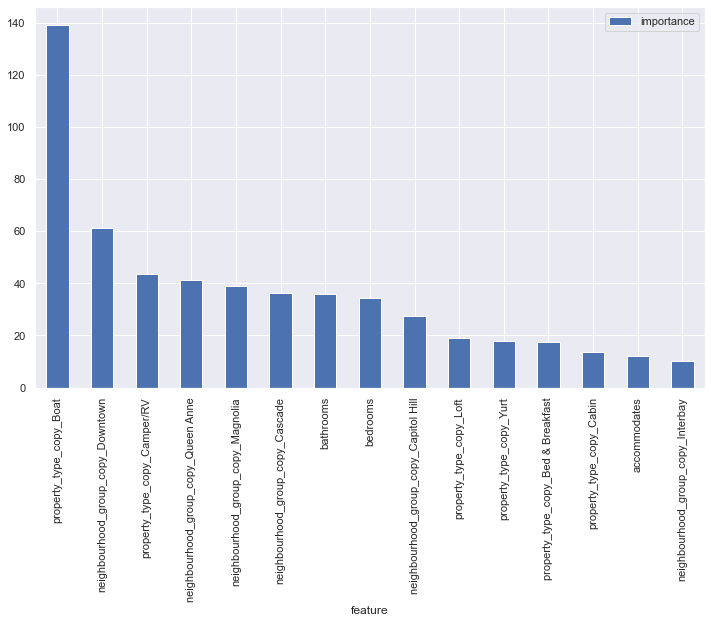

In [33]:
coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': lm_model.coef_})
_ = coefficients.sort_values('importance', ascending=False)[:15].plot(x='feature', y='importance', kind='bar')